In [19]:
# ===============================
# 監督式學習：回歸 — 以比特幣價格為例
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
url = "http://labfile.oss.aliyuncs.com/courses/1081/challenge-2-bitcoin.csv"
df = pd.read_csv(url)
df.head(1)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.0,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0


In [21]:
cols = ["btc_market_price", "btc_total_bitcoins", "btc_transaction_fees"]
data = df[cols]
data.head(1)

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0


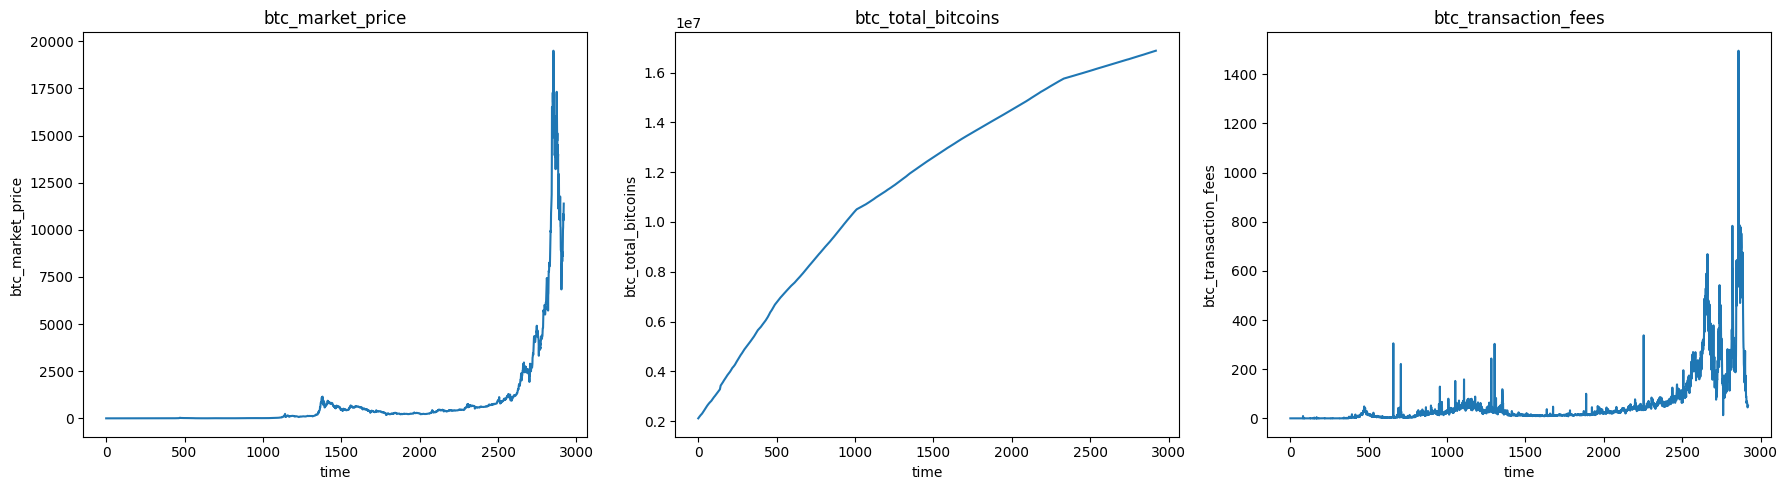

In [22]:
#畫出三條折線圖，水平排列
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, data.columns):
    ax.plot(data.index, data[col])
    ax.set_xlabel("time")
    ax.set_ylabel(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [23]:
#切分資料：70% 訓練 / 30% 測試 -------------------------------------------
def split_dataset():
    """
    將資料切成訓練集與測試集（70% / 30%）
    回傳：train_x, train_y, test_x, test_y
    """
    feature_cols = ["btc_total_bitcoins", "btc_transaction_fees"]
    target_col   = "btc_market_price"
    
    X = data[feature_cols].values
    y = data[target_col].values
    
    split_idx = int(len(data) * 0.7)
    
    train_x = X[:split_idx]
    train_y = y[:split_idx]
    test_x  = X[split_idx:]
    test_y  = y[split_idx:]
    
    
    return train_x, train_y, test_x, test_y

# 檢查形狀
train_x, train_y, test_x, test_y = split_dataset()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(2043, 2) (2043,) (877, 2) (877,)


In [24]:
#三次多項式回歸並計算 MAE
def poly3():
    """
    建立三次多項式回歸模型並回傳 MAE
    """
    train_x, train_y, test_x, test_y = split_dataset()
    
    poly = PolynomialFeatures(degree=3)
    model = LinearRegression()
    
    X_train_poly = poly.fit_transform(train_x)
    X_test_poly  = poly.transform(test_x)
    
    model.fit(X_train_poly, train_y)
    preds = model.predict(X_test_poly)
    
    mae = mean_absolute_error(test_y, preds)
    return mae

print("三次多項式 MAE：", poly3())

三次多項式 MAE： 2376.7567973406494


In [25]:
#1~N 次多項式回歸並繪製 MSE 曲線
def poly_plot(N=10):
    """
    計算 1 ~ N 次多項式模型在測試集上的 MSE，回傳 MSE 列表
    """
    train_x, train_y, test_x, test_y = split_dataset()
    mse = []
    
    for d in range(1, N + 1):
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        mse.append(mean_squared_error(test_y, pred))
        
    return mse

mse_list = poly_plot(10)

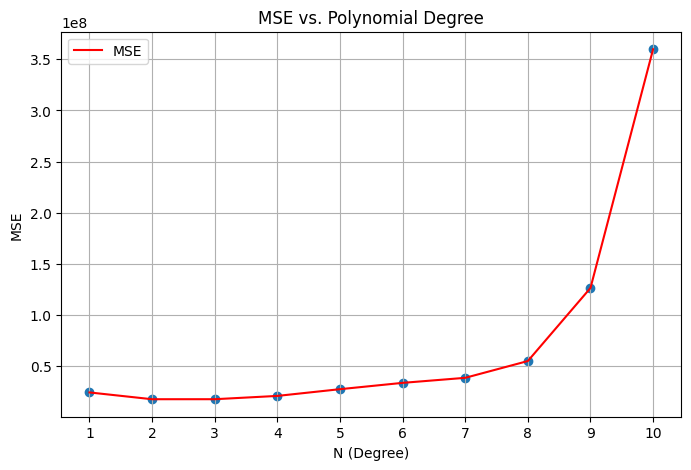

In [26]:
#畫圖（紅線＋散點）
plt.figure(figsize=(8, 5))
degrees = np.arange(1, 11)
plt.plot(degrees, mse_list, "r-", label="MSE")
plt.scatter(degrees, mse_list)
plt.title("MSE vs. Polynomial Degree")
plt.xlabel("N (Degree)")
plt.ylabel("MSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()